In [34]:
# Directory of fruits
import os
directory_path = os.getcwd()
print("My current directory is : " + directory_path)
# define the train and test images path
train_dir = directory_path + '\\inputimages\\train\\'
test_dir = directory_path + '\\inputimages\\test\\'

My current directory is : C:\Users\user\JupyterNotebook\projFruitImagesClassification


In [35]:
# list the image file(s)
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        if filename.split(".")[-1] == "txt": 
            continue
        print(os.path.join(dirname, filename))

C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_224 (2).jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_328.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_330.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_332.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_333.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_334.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_335.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_336.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_337.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_338.jpg
C:\Users\user\JupyterNoteb

In [36]:
fruits_name = []
fruits_image = []
fruits_dir = []
i = 0
for subdir in os.listdir(train_dir):
    fruits_dir.append(i) # name of the fruit i.e. label
    i += 1
    for image_filename in os.listdir(train_dir + subdir):
        if image_filename.split(".")[-1] == "txt":
            continue
        fruits_name.append(subdir) # name of the fruit 
        fruits_image.append(subdir + '/' + image_filename) # image of the fruit

In [37]:
import pandas as pd # data processing, CSV file I/O
train_fruits = pd.DataFrame(fruits_name, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image
train_fruits

,Fruits,Fruits Image
0,apple,apple/image_0.jpg
1,apple,apple/image_10.jpg
2,apple,apple/image_101.jpg
3,apple,apple/image_102.jpg
4,apple,apple/image_103.jpg
...,...,...
1495,strawberry,strawberry/image_456.jpg
1496,strawberry,strawberry/image_457.jpg
1497,strawberry,strawberry/image_458.jpg
1498,strawberry,strawberry/image_459.jpg


In [38]:
# count for each fruit
from collections import Counter
# newData is a dictionary
newData = Counter(train_fruits["Fruits"])
print("Found fruits in the data set and their corresponding count of image(s)")
# newData is dictionary
# newData2 is list of tuple 
newData2 = newData.most_common()
newData2

Found fruits in the data set and their corresponding count of image(s)


[('apple', 300),
 ('banana', 300),
 ('mango', 300),
 ('orange', 300),
 ('strawberry', 300)]

In [39]:
# list each fruit
x,y = zip(*newData2)
x,y = list(x),list(y)
print("Found fruits: ", x)
print("Number of Images: ", y)

Found fruits:  ['apple', 'banana', 'mango', 'orange', 'strawberry']
Number of Images:  [300, 300, 300, 300, 300]


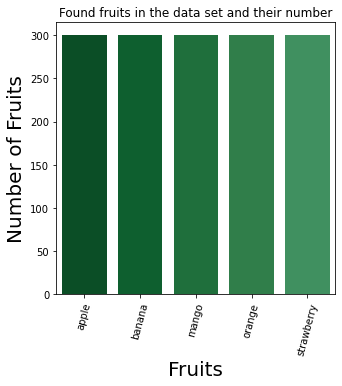

In [40]:
# plot graphic for each fruit
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15)) 
plt.xlabel('Fruits', size = 20) 
plt.ylabel('Number of Fruits', size = 20 )
plt.xticks(rotation = 75)
plt.title('Found fruits in the data set and their number') 
plt.show()

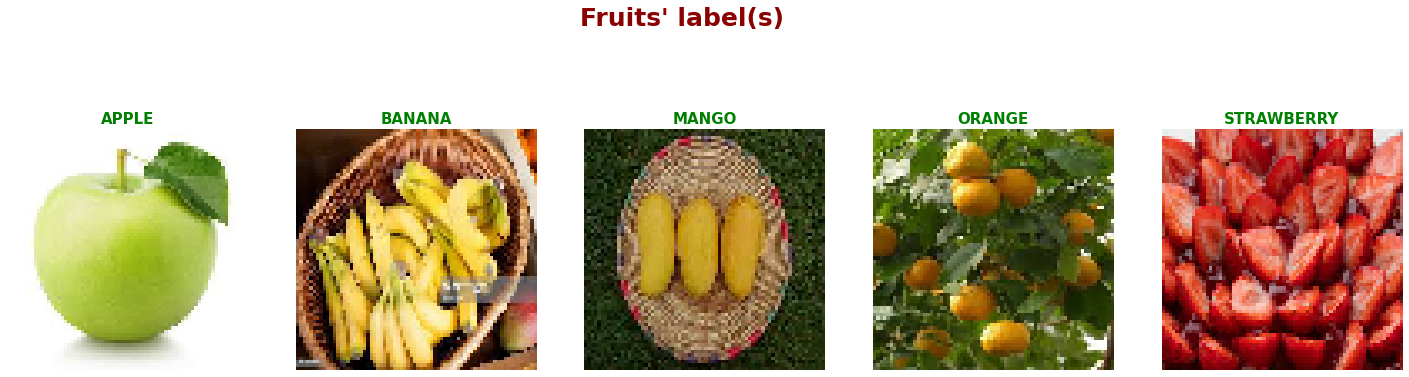

In [41]:
import cv2
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt2
plt2.figure(figsize=(25,16))
how_many_fruits = len(x)

for i in range(how_many_fruits):
    fruits = train_fruits[train_fruits["Fruits"] == x[i]]["Fruits Image"].values [1]    
    plt2.subplot(3,5,i+1)
    img = load_img(train_dir + fruits, target_size=(72, 72))    
    plt2.imshow(img)
    plt2.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt2.axis("off")

plt2.suptitle("Fruits' label(s)", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt2.show()

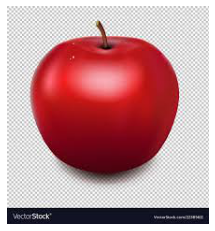

In [42]:
# open an image
img = load_img(train_dir + "/apple/image_19.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [43]:
# what is the shape of image?
from tensorflow.keras.utils import img_to_array
array_image = img_to_array(img)
print("Image Shape: ", array_image.shape)

Image Shape:  (233, 216, 3)


In [44]:
# show how many type(s) of fruit
from glob import glob
fruitCountUnique = glob(train_dir + '/*' )
# declare numberOfClass i.e. 5 fruits
numberOfClass = len(fruitCountUnique)
print("How many different fruits: ", numberOfClass)

How many different fruits:  5


In [45]:
# import model 
import tensorflow as tf 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#import warnings
import warnings
warnings.filterwarnings('ignore')
model = Sequential()
# convolution layer (1 st)
model.add(Conv2D(
    filters=32,
    kernel_size = (3, 3),
    input_shape = (72, 72, 3),
    activation = 'relu'))
# pooling layer (1st)
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer (1st)
model.add(Dropout(0.1))

# convolution layer (2nd)
model.add(Conv2D(
    filters=64, 
    kernel_size = (3, 3),
    activation = 'relu'))
# pooling layer (2nd)
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer (2nd )
model.add(Dropout(0.2))

# convlution layer (3rd)
model.add(Conv2D(
    filters=64,
    kernel_size = (3, 3),
    activation = 'relu'))
# pooling layer (3rd)
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer (3rd )
model.add(Dropout(0.3))
# flatten layer
model.add(Flatten())
# Dense layer
model.add(Dense(
    units=512, 
    activation='relu'))
# dropout layer
# model.add(Dropout(0.2))
# output layer
model.add(Dense(
    units=numberOfClass, 
    activation='softmax')) 

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 70, 70, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 35, 35, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)       

In [47]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"])

In [48]:

# number of training
epochs = 100  
# get 32 images per training
batch_size = 32

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale= 1./255, # normalize from 0~255 to 0~1
    shear_range = 0.3,
    horizontal_flip=True,
    zoom_range = 0.3,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (72, 72),
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode= "categorical")


Found 1500 images belonging to 5 classes.


In [49]:

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (72, 72),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")


Found 500 images belonging to 5 classes.


In [50]:
# get the shape from train_generator
for data_batch, labels_batch in train_generator:
    print("data_batch (train) shape: ", data_batch.shape)
    print("labels_batch (train) shape: ", labels_batch.shape)
    break
# get the shape from test_generator
for data_batch, labels_batch in test_generator:
    print("data_batch (test) shape: ", data_batch.shape)
    print("labels_batch (test) shape: ", labels_batch.shape)
    break

data_batch (train) shape:  (32, 72, 72, 3)
labels_batch (train) shape:  (32, 5)
data_batch (test) shape:  (32, 72, 72, 3)
labels_batch (test) shape:  (32, 5)


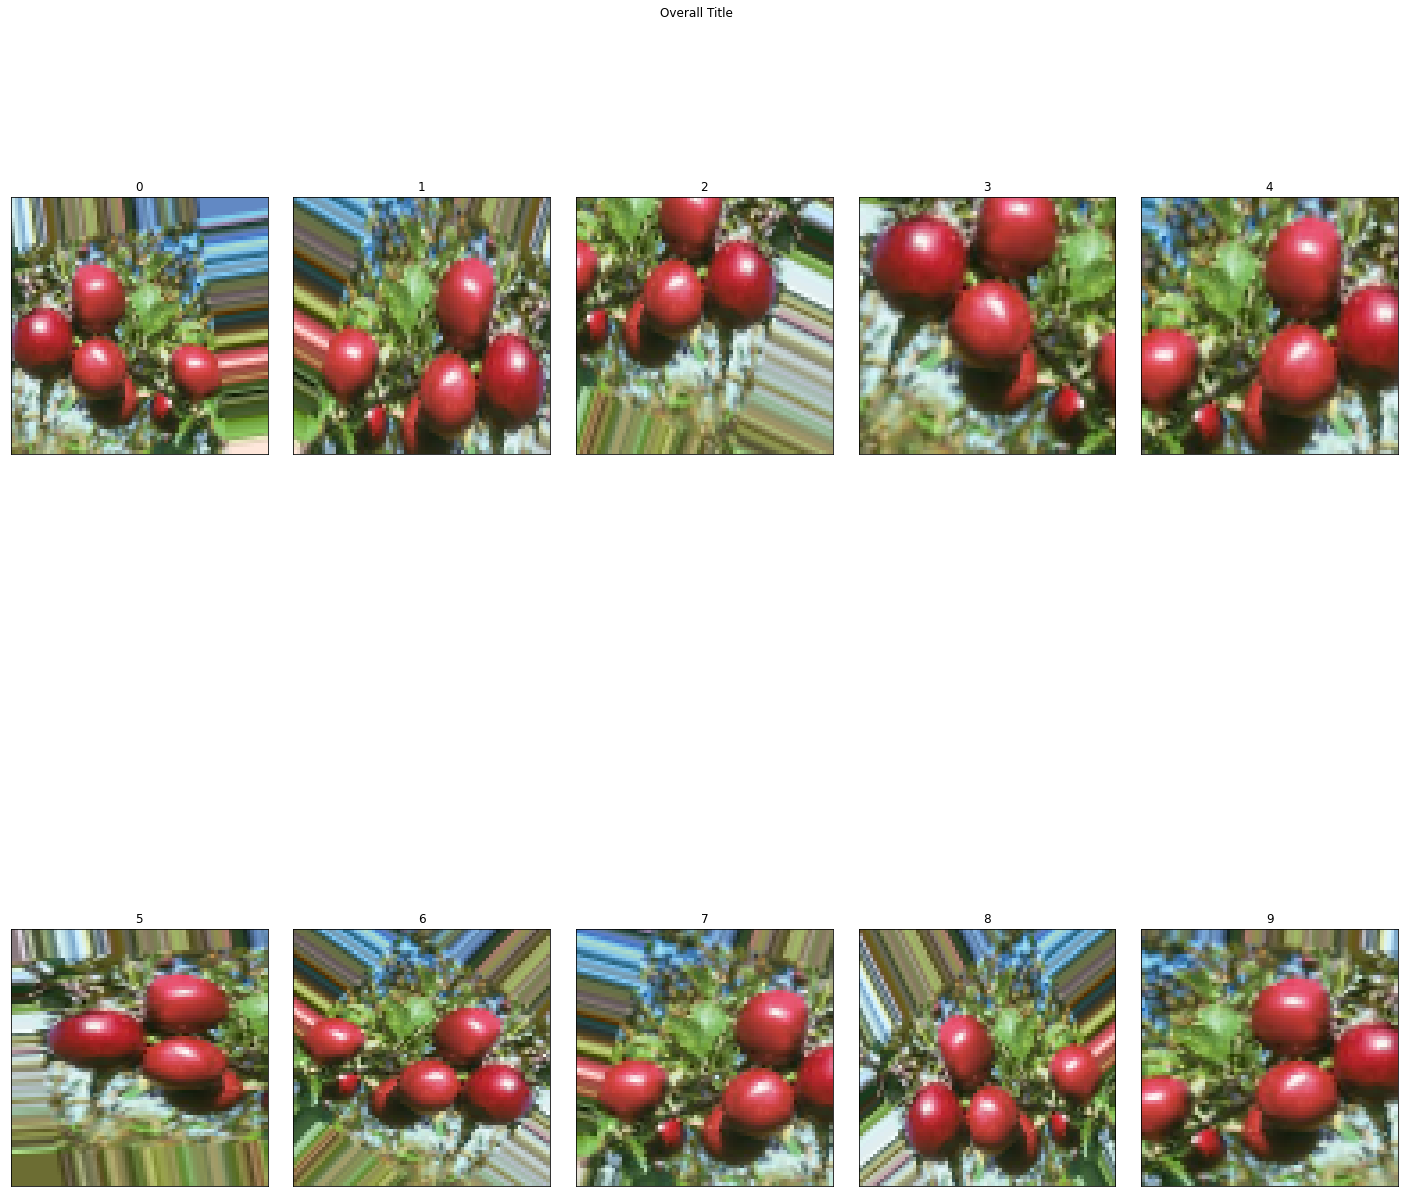

In [103]:
# try to reveal what the train_datagen containing images are

%matplotlib inline
import matplotlib.pyplot as plt3
from tensorflow.keras.preprocessing import image

thispath = train_dir + "\\apple"
fnames = [os.path.join(thispath, fname) for
    fname in os.listdir(thispath)]
img_path = fnames[3]

# print(img_path)

img = image.load_img(img_path, target_size=(72, 72))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# print(x)

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,20))
fig.tight_layout(h_pad = 2)

fig.suptitle('Overall Title')
# set the spacing between subplots
plt3.subplots_adjust(wspace=0.1, hspace=0.1)

i=0
for batch in train_datagen.flow(x, batch_size=1):
    #plt3.figure(i)
    # imgplot = plt3.imshow(image.array_to_img(batch[0]))
    #axs[0, i] = plt.subplot(1,4,i+1)
    axs[i//5, i%5].imshow(image.array_to_img(batch[0]))
    axs[i//5, i%5].set_title(i)
    axs[i//5, i%5].set_xticks([])
    axs[i//5, i%5].set_yticks([])
    i += 1
    if i % 10 == 0:
        break
plt3.show()

In [104]:

hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = (train_generator.samples) // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = (test_generator.samples) // batch_size)
model.save('model.h5')

Epoch 1/100
46/46 [==============================] - 7s 142ms/step - loss: 1.6456 - accuracy: 0.2514 - val_loss: 1.4357 - val_accuracy: 0.3625
Epoch 2/100
46/46 [==============================] - 6s 136ms/step - loss: 1.4466 - accuracy: 0.3576 - val_loss: 1.4127 - val_accuracy: 0.3479
Epoch 3/100
46/46 [==============================] - 6s 135ms/step - loss: 1.3508 - accuracy: 0.4033 - val_loss: 1.2800 - val_accuracy: 0.4604
Epoch 4/100
46/46 [==============================] - 6s 138ms/step - loss: 1.2684 - accuracy: 0.4448 - val_loss: 1.2395 - val_accuracy: 0.4563
Epoch 5/100
46/46 [==============================] - 6s 137ms/step - loss: 1.2410 - accuracy: 0.4693 - val_loss: 1.1733 - val_accuracy: 0.4938
Epoch 6/100
46/46 [==============================] - 6s 135ms/step - loss: 1.2189 - accuracy: 0.5109 - val_loss: 1.1930 - val_accuracy: 0.5021
Epoch 7/100
46/46 [==============================] - 6s 136ms/step - loss: 1.1578 - accuracy: 0.5157 - val_loss: 1.2015 - val_accuracy: 0.5375

Epoch 58/100
46/46 [==============================] - 6s 137ms/step - loss: 0.7936 - accuracy: 0.6955 - val_loss: 0.9443 - val_accuracy: 0.6771
Epoch 59/100
46/46 [==============================] - 6s 135ms/step - loss: 0.7701 - accuracy: 0.6969 - val_loss: 1.0773 - val_accuracy: 0.6417
Epoch 60/100
46/46 [==============================] - 6s 137ms/step - loss: 0.7495 - accuracy: 0.7119 - val_loss: 1.2781 - val_accuracy: 0.6458
Epoch 61/100
46/46 [==============================] - 6s 136ms/step - loss: 0.7887 - accuracy: 0.7030 - val_loss: 0.8848 - val_accuracy: 0.6938
Epoch 62/100
46/46 [==============================] - 6s 136ms/step - loss: 0.7506 - accuracy: 0.7071 - val_loss: 0.9373 - val_accuracy: 0.7063
Epoch 63/100
46/46 [==============================] - 6s 136ms/step - loss: 0.7849 - accuracy: 0.6846 - val_loss: 0.9925 - val_accuracy: 0.6750
Epoch 64/100
46/46 [==============================] - 7s 153ms/step - loss: 0.7794 - accuracy: 0.6996 - val_loss: 0.9291 - val_accuracy:

In [105]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

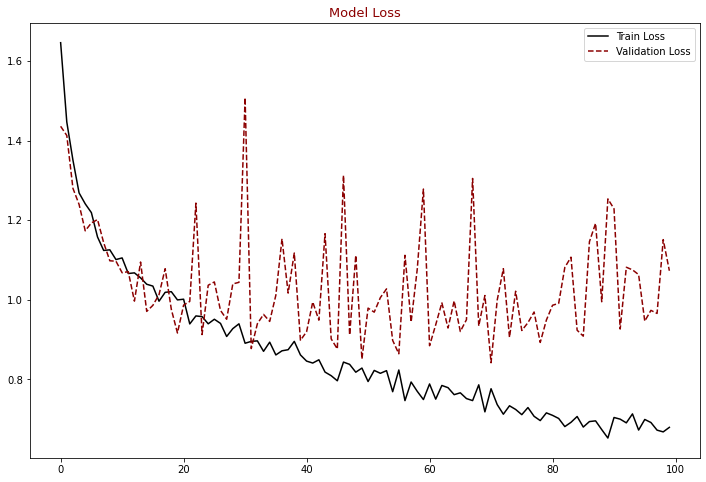

In [106]:
import matplotlib.pyplot as plt1
plt1.figure(figsize=(12, 8))
plt1.plot(hist.history["loss"], label = "Train Loss", color = "black")
plt1.plot(hist.history["val_loss"], label = "Validation Loss", color = "darkred", 
         linestyle="dashed", markeredgecolor = "purple", markeredgewidth = 2)
plt1.title("Model Loss", color = "darkred", size = 13)
plt1.legend()
plt1.show()

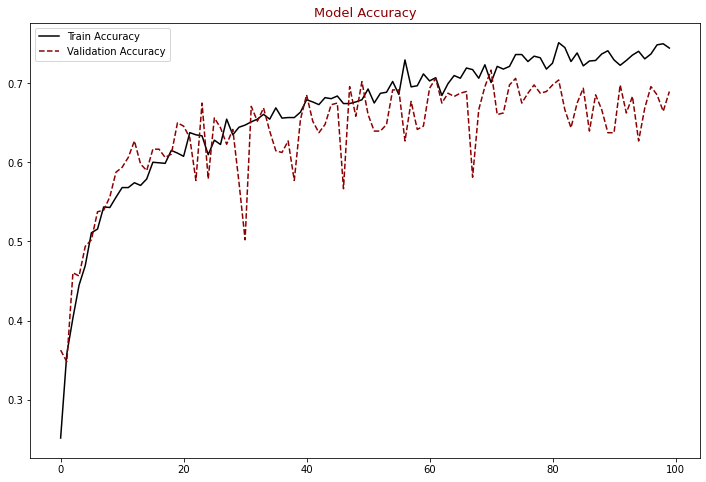

In [107]:
import matplotlib.pyplot as plt2
plt2.figure(figsize=(12, 8))
plt2.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt2.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", 
         linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt2.title("Model Accuracy", color = "darkred", size = 13)
plt2.legend()
plt2.show()